<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Dimensionality%20Reduction/Autoencoders/autoencoder_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders from Scratch (No Deep Learning Libraries)

This notebook demonstrates a **basic autoencoder** implemented from scratch using only **NumPy**. Autoencoders are powerful neural networks used for **unsupervised learning**, especially in **dimensionality reduction**, **feature learning**, and **anomaly detection**.


## What is an Autoencoder?

An **autoencoder** is a special kind of feedforward neural network trained to copy its input to its output.

It consists of two parts:
- **Encoder**: Compresses the input into a smaller (latent) representation.
- **Decoder**: Reconstructs the input from the compressed version.

Autoencoders learn meaningful representations by minimizing the reconstruction error.

## Structure

```
Input → Encoder → Bottleneck (latent) → Decoder → Output
```

## Generate Sample Data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

# Load and scale the data
digits = load_digits()
X = digits.data
X = MinMaxScaler().fit_transform(X)
print(X)
print("Data shape:", X.shape)  # (1797, 64)

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
Data shape: (1797, 64)


## Build Autoencoder Model with NumPy

```
1 hidden layer encoder → bottleneck → 1 hidden layer decoder
```

In [2]:
# Architecture
n_input = X.shape[1]      # 64
n_hidden = 32             # Encoder layer
n_code = 16               # Bottleneck
n_hidden2 = 32            # Decoder layer
n_output = n_input        # Reconstruct input

# Initialize weights and biases
def init_weights(shape):
    return np.random.randn(*shape) * 0.1

W1 = init_weights((n_input, n_hidden))
b1 = np.zeros(n_hidden)

W2 = init_weights((n_hidden, n_code))
b2 = np.zeros(n_code)

W3 = init_weights((n_code, n_hidden2))
b3 = np.zeros(n_hidden2)

W4 = init_weights((n_hidden2, n_output))
b4 = np.zeros(n_output)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

## Train the Autoencoder

In [3]:
# Training settings
epochs = 100
lr = 0.1

losses = []

for epoch in range(epochs):
    total_loss = 0
    for x in X:
        ## FORWARD PASS
        x = x.reshape(1, -1)

        z1 = x @ W1 + b1
        a1 = sigmoid(z1)

        z2 = a1 @ W2 + b2
        code = sigmoid(z2)  # Bottleneck

        z3 = code @ W3 + b3
        a3 = sigmoid(z3)

        z4 = a3 @ W4 + b4
        output = sigmoid(z4)

        ## LOSS (Mean Squared Error)
        error = output - x
        loss = np.mean(error ** 2)
        total_loss += loss

        ## BACKPROP
        d4 = error * sigmoid_derivative(z4)
        d3 = d4 @ W4.T * sigmoid_derivative(z3)
        d2 = d3 @ W3.T * sigmoid_derivative(z2)
        d1 = d2 @ W2.T * sigmoid_derivative(z1)

        # Update weights and biases
        W4 -= lr * a3.T @ d4
        b4 -= lr * d4.flatten()

        W3 -= lr * code.T @ d3
        b3 -= lr * d3.flatten()

        W2 -= lr * a1.T @ d2
        b2 -= lr * d2.flatten()

        W1 -= lr * x.T @ d1
        b1 -= lr * d1.flatten()

    losses.append(total_loss / len(X))
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss / len(X):.4f}")

Epoch 0, Loss: 0.0756
Epoch 10, Loss: 0.0495
Epoch 20, Loss: 0.0287
Epoch 30, Loss: 0.0221
Epoch 40, Loss: 0.0170
Epoch 50, Loss: 0.0142
Epoch 60, Loss: 0.0120
Epoch 70, Loss: 0.0111
Epoch 80, Loss: 0.0102
Epoch 90, Loss: 0.0094


## Visualize the Reconstructions


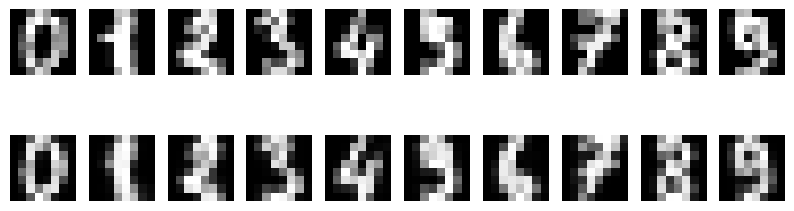

In [4]:
# Plot original vs reconstructed digits
n = 10
plt.figure(figsize=(10, 3))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap="gray")
    plt.axis("off")

    # Forward pass
    x = X[i].reshape(1, -1)
    a1 = sigmoid(x @ W1 + b1)
    code = sigmoid(a1 @ W2 + b2)
    a3 = sigmoid(code @ W3 + b3)
    output = sigmoid(a3 @ W4 + b4)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(output.reshape(8, 8), cmap="gray")
    plt.axis("off")


## Summary

- Autoencoders learn compressed representations of data
- They reconstruct input with minimal loss
- We implemented:
  - Forward propagation (encoder → decoder)
  - Loss function: MSE
  - Backpropagation using NumPy
- Visualized digit reconstruction from raw input
